In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
label = LabelEncoder()
label.fit(df['Gender'])
df['Gender'] = label.transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
X = df[['Gender','Age','EstimatedSalary']]
Y = df[['Purchased']]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

**Feature Scaling**

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Fitting SVM to the Training set**

In [11]:
vm = svm.SVC()
vm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

**Predicting the Test set results**

In [12]:
y_pred =  vm.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

**Making the Confusion Matrix**

In [14]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[76,  6],
       [ 1, 37]])

**Visualising the Training set results**

In [16]:
training_score = vm.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 90.0


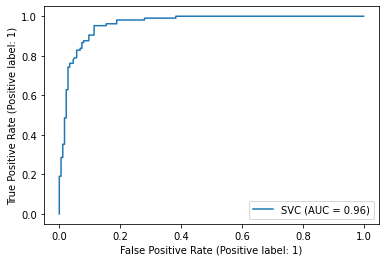

In [18]:
RocCurveDisplay.from_estimator(vm,x_train,y_train)

**Visualising the Test set results**

In [19]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 94.16666666666667


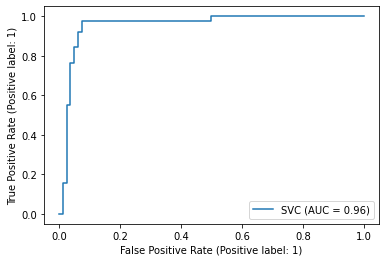

In [21]:
RocCurveDisplay.from_estimator(vm,x_test,y_test)